In [383]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import soundfile as sf
from IPython.display import Audio, display


In [384]:
class FIR_filter_1:
    
    def __init__(self, cutoff, slope, M, samplerate, passes=1, style='bandpass'):
        self.cutoff = cutoff
        self.slope = slope
        
        self.M = M
        #keep it odd
        if self.M % 2 == 0:
            self.M += 1
            
        self.samplerate = samplerate
        self.passes = passes
        self.style = style
        
        self.window = self.make_window()
        
        self.i_r = np.fft.ifft(self.window)
        
        #take values from self.ir
        self.B = np.real(np.append(self.i_r[len(self.i_r)-(self.M//2):], self.i_r[:self.M//2+1]))

        
        return
    
    def process(self, signal):
        
        if self.style == 'highpass' or self.style == 'bandstop':
            allpass = np.append(np.full(self.M//2, 0), .5)
            allpass = np.append(allpass, np.full(self.M//2, 0))
            self.B = allpass - self.B
            
        output = np.full(len(signal), 0.0)
        
        for N in range(self.M, len(signal)):
            for K in range(self.M):
                output[N] += self.B[K] * signal[N - K]

        return output
    
    

    
    def make_window(self):
        '''
        converts the given values into a window based on hanning
        
        current bandp and band s ar uninterupted curves
        
        also lp and hp are all curves
        
        need another arg?
        '''
        if self.style == 'bandpass':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))           
            
        elif self.style == 'bandstop':
            window = np.append(np.full(self.cutoff - (self.slope), 0), np.hanning(self.slope*2))
            window = np.append(window, np.full(self.samplerate-(self.cutoff - (self.slope)), 0))  
                               
        elif self.style == 'lowpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
            
        elif self.style == 'highpass':
            window = np.append(np.full(self.cutoff, 1), np.hanning(self.slope*2)[self.slope:])
            window = np.append(window, np.full(self.samplerate - self.cutoff - self.slope, 0))
        
        return window
        
    def print_window(self):
        """
        prints the window, its impules responce and its freq resonce
        """
        plt.figure(figsize=(6,2))
        plt.subplot(121)
        plt.plot(self.window[:self.samplerate])
        plt.title('Ideal responce of the filter')
        plt.xlabel('Frequency')
        plt.ylabel('Gain')
        #plt.show()
        
        plt.subplot(122)
        #i_r = np.fft.ifft(self.window)
        plt.plot(self.B)
        plt.show()
        
        return
    
        
    def set_cuttoff(self, val):
        self.cutoff = val
    
    def set_M(self, val):
        self.M = val
        
    def set_slope(self, val):
        self.slope = val
        
    def set_passes(self, val):
        self.passes = val
    
  

In [385]:
def plot_fft(signal, signal2, samplerate):
    plt.figure(figsize=(6,2))
    
    # Plot frequency response (in dB).
    signal = np.abs(np.fft.fft(signal))[:len(signal)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  signal)

    signal2 = np.abs(np.fft.fft(signal2))[:len(signal2)//2]
    plt.plot(np.linspace(0, samplerate//2, len(signal)),  0-signal2)
    
    plt.xlabel('Normalized frequency')
    plt.ylabel('Gain [dB]')
    #plt.ylim([-100, 10])
    plt.grid()
    plt.show()



In [386]:
def normalize(signal):

    highest = 0
    for i in range(len(signal)):
        if np.abs(signal[i]) > highest:
            highest = np.abs(signal[i])
    
    return signal / highest
    
    

LOWPASS: cutoff=100, slope=1000,


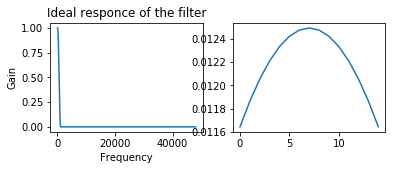

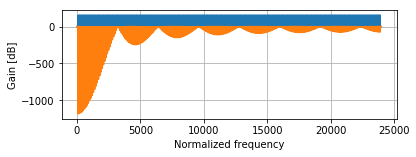

In [396]:
# here i make a white noise to measure real responce against
w_noise, samplerate = sf.read('noise.wav')

w_noise = normalize(w_noise)

print('LOWPASS: cutoff=100, slope=1000,')
filt_1 = FIR_filter_1(cutoff=100, slope=1000, M=15, samplerate=samplerate, style='lowpass')
filt_1.print_window()

signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

LOWPASS: cutoff=12000, slope=3000,


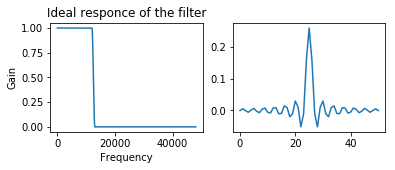

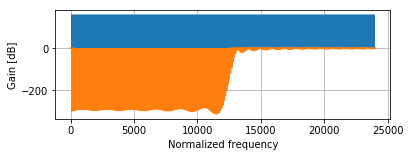

In [397]:
filt_1 = FIR_filter_1(cutoff=12000, slope=1000, M=50, samplerate=samplerate, style='lowpass')


print('LOWPASS: cutoff=12000, slope=3000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

HIGHPASS: cutoff=12000, slope=3000,


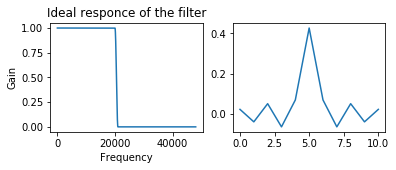

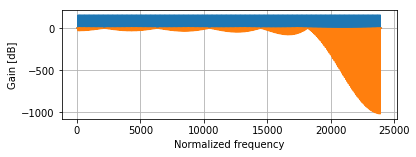

In [398]:
filt_1 = FIR_filter_1(cutoff=20000, slope=1000, M=11, samplerate=samplerate, style='highpass')

print('HIGHPASS: cutoff=12000, slope=3000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)


HIGHPASS: cutoff=20000, slope=1000,


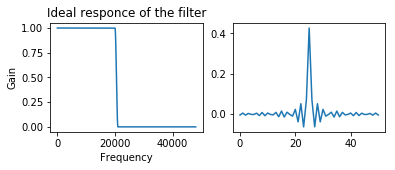

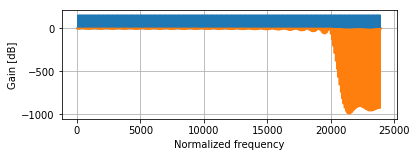

In [399]:
filt_1 = FIR_filter_1(cutoff=20000, slope=1000, M=50, samplerate=samplerate, style='highpass')


print('HIGHPASS: cutoff=20000, slope=1000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

BANDPASS: cutoff=12000, slope=6000,


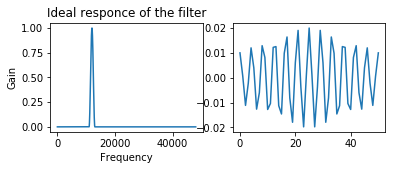

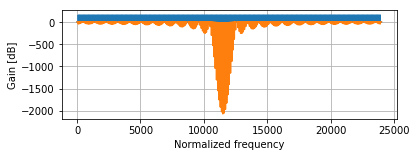

In [400]:
filt_1 = FIR_filter_1(cutoff=12000, slope=1000, M=50, samplerate=samplerate, style='bandpass')


print('BANDPASS: cutoff=12000, slope=6000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

BANDPASS: cutoff=12000, slope=3000,


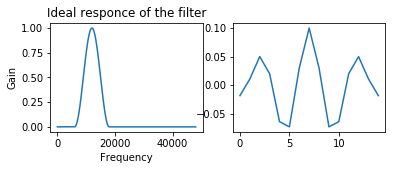

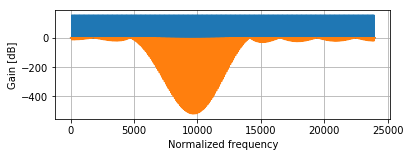

In [401]:
filt_1 = FIR_filter_1(cutoff=12000, slope=6000, M=15, samplerate=samplerate, style='bandpass')


print('BANDPASS: cutoff=12000, slope=3000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

BANDSTOP: cutoff=12000, slope=1000,


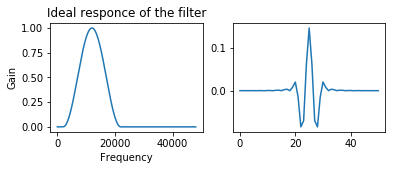

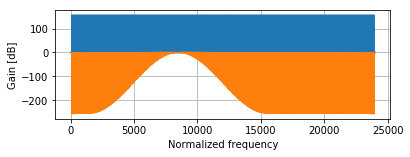

In [402]:
filt_1 = FIR_filter_1(cutoff=12000, slope=10000, M=50, samplerate=samplerate, style='bandstop')


print('BANDSTOP: cutoff=12000, slope=1000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

BANDSTOP: cutoff=12000, slope=3000,


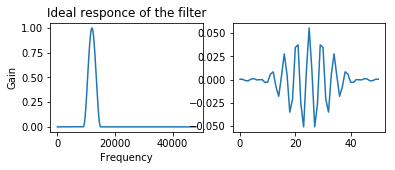

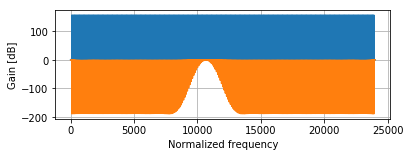

In [403]:
filt_1 = FIR_filter_1(cutoff=12000, slope=3000, M=50, samplerate=samplerate, style='bandstop')


print('BANDSTOP: cutoff=12000, slope=3000,')
filt_1.print_window()
signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

samplerate: 11025
LOWPASS: cutoff=1000, slope=1000,


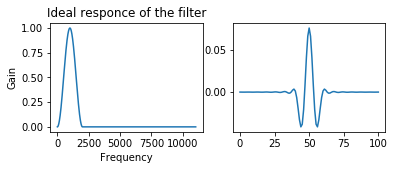

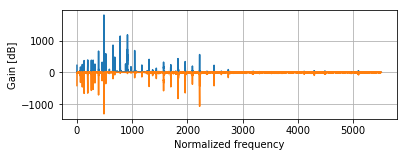

In [395]:
# here i make a white noise to measure real responce against
w_noise, samplerate = sf.read('sitar.wav')
print('samplerate: {}'.format(samplerate))

w_noise = normalize(w_noise)

print('LOWPASS: cutoff=1000, slope=1000,')
filt_1 = FIR_filter_1(cutoff=1000, slope=1000, M=100, samplerate=samplerate, style='bandstop')

filt_1.print_window()

signal = normalize(filt_1.process(w_noise))
plot_fft(w_noise, signal, samplerate)

In [379]:
print('The Original Audio')
display(Audio(w_noise, rate=samplerate))
    
print('The Filtered Audio')
display(Audio(signal, rate=samplerate))

The Original Audio


The Filtered Audio
